In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as font_manager
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import rcParams
from scipy.interpolate import griddata

sns.set_theme(style="white")
font_path = (
    "/home/femtomc/.local/share/fonts/Unknown Vendor/TrueType/Lato/Lato_Bold.ttf"
)
font_manager.fontManager.addfont(font_path)
custom_font_name = font_manager.FontProperties(fname=font_path).get_name()
rcParams["mathtext.fontset"] = "cm"
rcParams["font.family"] = "STIXGeneral"
# rcParams["font.family"] = custom_font_name
rcParams["figure.autolayout"] = True
label_fontsize = 70  # Set the desired font size here

In [2]:
enum_air = pd.read_csv("./training_runs/grasp_air_enum_epochs_41_mccoy_prior.csv")

In [3]:
reinforce_air = pd.read_csv(
    "./training_runs/grasp_air_reinforce_epochs_41_mccoy_prior.csv"
)

In [4]:
reinforce_iwae_air = pd.read_csv(
    "./training_runs/grasp_air_iwae_2_reinforce_epochs_41_mccoy_prior.csv"
)

In [5]:
mvd_air = pd.read_csv("./training_runs/grasp_air_mvd_epochs_41_mccoy_prior.csv")

In [6]:
mvd_iwae_air = pd.read_csv(
    "./training_runs/grasp_air_iwae_2_mvd_epochs_41_mccoy_prior.csv"
)

In [7]:
arr = np.array(mvd_iwae_air["Mean epoch wall clock times"])
(np.mean(arr[1:] - arr[0:-1]), np.std(arr[1:] - arr[0:-1]))

(3.7405024999999994, 0.05664062141166831)

In [8]:
pyro_reinforce_air = pd.read_csv(
    "./training_runs/pyro_air_reinforce_epochs_41_mccoy_prior_0.csv",
)
pyro_reinforce_air

,ELBO loss,Accuracy,Epoch wall clock times
0,-471.029876,0.282833,13.831644
1,-515.014639,0.217567,26.490432
2,-539.283321,0.244383,40.397398
3,-553.292918,0.291967,52.896030
4,-560.732196,0.297533,64.866069
5,-566.669015,0.449767,76.741475
6,-572.186219,0.389283,88.770469
7,-576.110484,0.416233,100.731169
8,-579.742101,0.378250,112.721747
9,-581.281858,0.412267,124.693039


In [9]:
pyro_reinforce_baselines_air = pd.read_csv(
    "./training_runs/pyro_air_reinforce_baselines_epochs_41_mccoy_prior_0.csv",
)
pyro_reinforce_baselines_air

,ELBO loss,Accuracy,Epoch wall clock times
0,-482.259742,0.543933,39.758546
1,-551.007866,0.882767,79.707291
2,-581.018023,0.936283,120.834669
3,-593.341995,0.955900,161.492671
4,-601.998984,0.963400,201.747626
5,-606.499513,0.966450,241.875930
6,-610.913430,0.970767,282.793947
7,-614.647391,0.972650,323.588301
8,-617.599209,0.973617,363.781369
9,-620.171542,0.978117,403.547890


In [10]:
hybrid_mvd_air = pd.read_csv(
    "./training_runs/grasp_air_hybrid_mvd_enum_epochs_41_mccoy_prior.csv",
)
hybrid_mvd_air

,Mean ELBO loss,Mean accuracy,Mean epoch wall clock times,Std ELBO loss,Std accuracy,Std epoch wall clock times
0,-12.961291,0.222587,1.862117,8.014437,0.000874,0.054167
1,402.529500,0.223267,3.882442,0.347449,0.001198,0.212189
2,422.556500,0.227243,5.782875,0.366148,0.001442,0.291162
3,440.688570,0.236943,7.696792,0.468127,0.001456,0.297673
4,453.119200,0.248217,9.712064,0.203340,0.001944,0.343142
5,456.944430,0.258447,11.696223,0.057599,0.001798,0.445854
6,458.206760,0.270667,13.658195,0.061335,0.001083,0.512667
7,459.129060,0.286140,15.644282,0.057479,0.003563,0.501631
8,459.900800,0.334043,17.661203,0.266329,0.043666,0.470399
9,475.682430,0.546000,19.631815,6.114736,0.100653,0.504563


In [11]:
hybrid_iwae_mvd_air = pd.read_csv(
    "./training_runs/grasp_air_iwae_2_hybrid_mvd_enum_epochs_41_mccoy_prior.csv",
)
hybrid_iwae_mvd_air

,Mean ELBO loss,Mean accuracy,Mean epoch wall clock times,Std ELBO loss,Std accuracy,Std epoch wall clock times
0,276.36750,0.234633,5.287178,2.587729,0.001677,0.171050
1,429.68832,0.258483,10.707959,0.297122,0.002471,0.384104
2,453.40000,0.400193,15.902045,0.412627,0.006778,0.435408
3,482.69846,0.528327,21.159600,0.784873,0.010204,0.550937
4,515.89417,0.708997,26.420033,3.645734,0.009725,0.667856
5,544.55005,0.788310,31.865885,3.506346,0.017831,0.711416
6,563.15170,0.840580,37.400000,3.494707,0.023422,0.957262
7,578.35394,0.884407,43.022877,3.090755,0.020730,1.260049
8,588.54236,0.909397,48.355892,2.460574,0.016835,1.371734
9,595.73630,0.924650,53.897064,1.981040,0.015868,1.715311


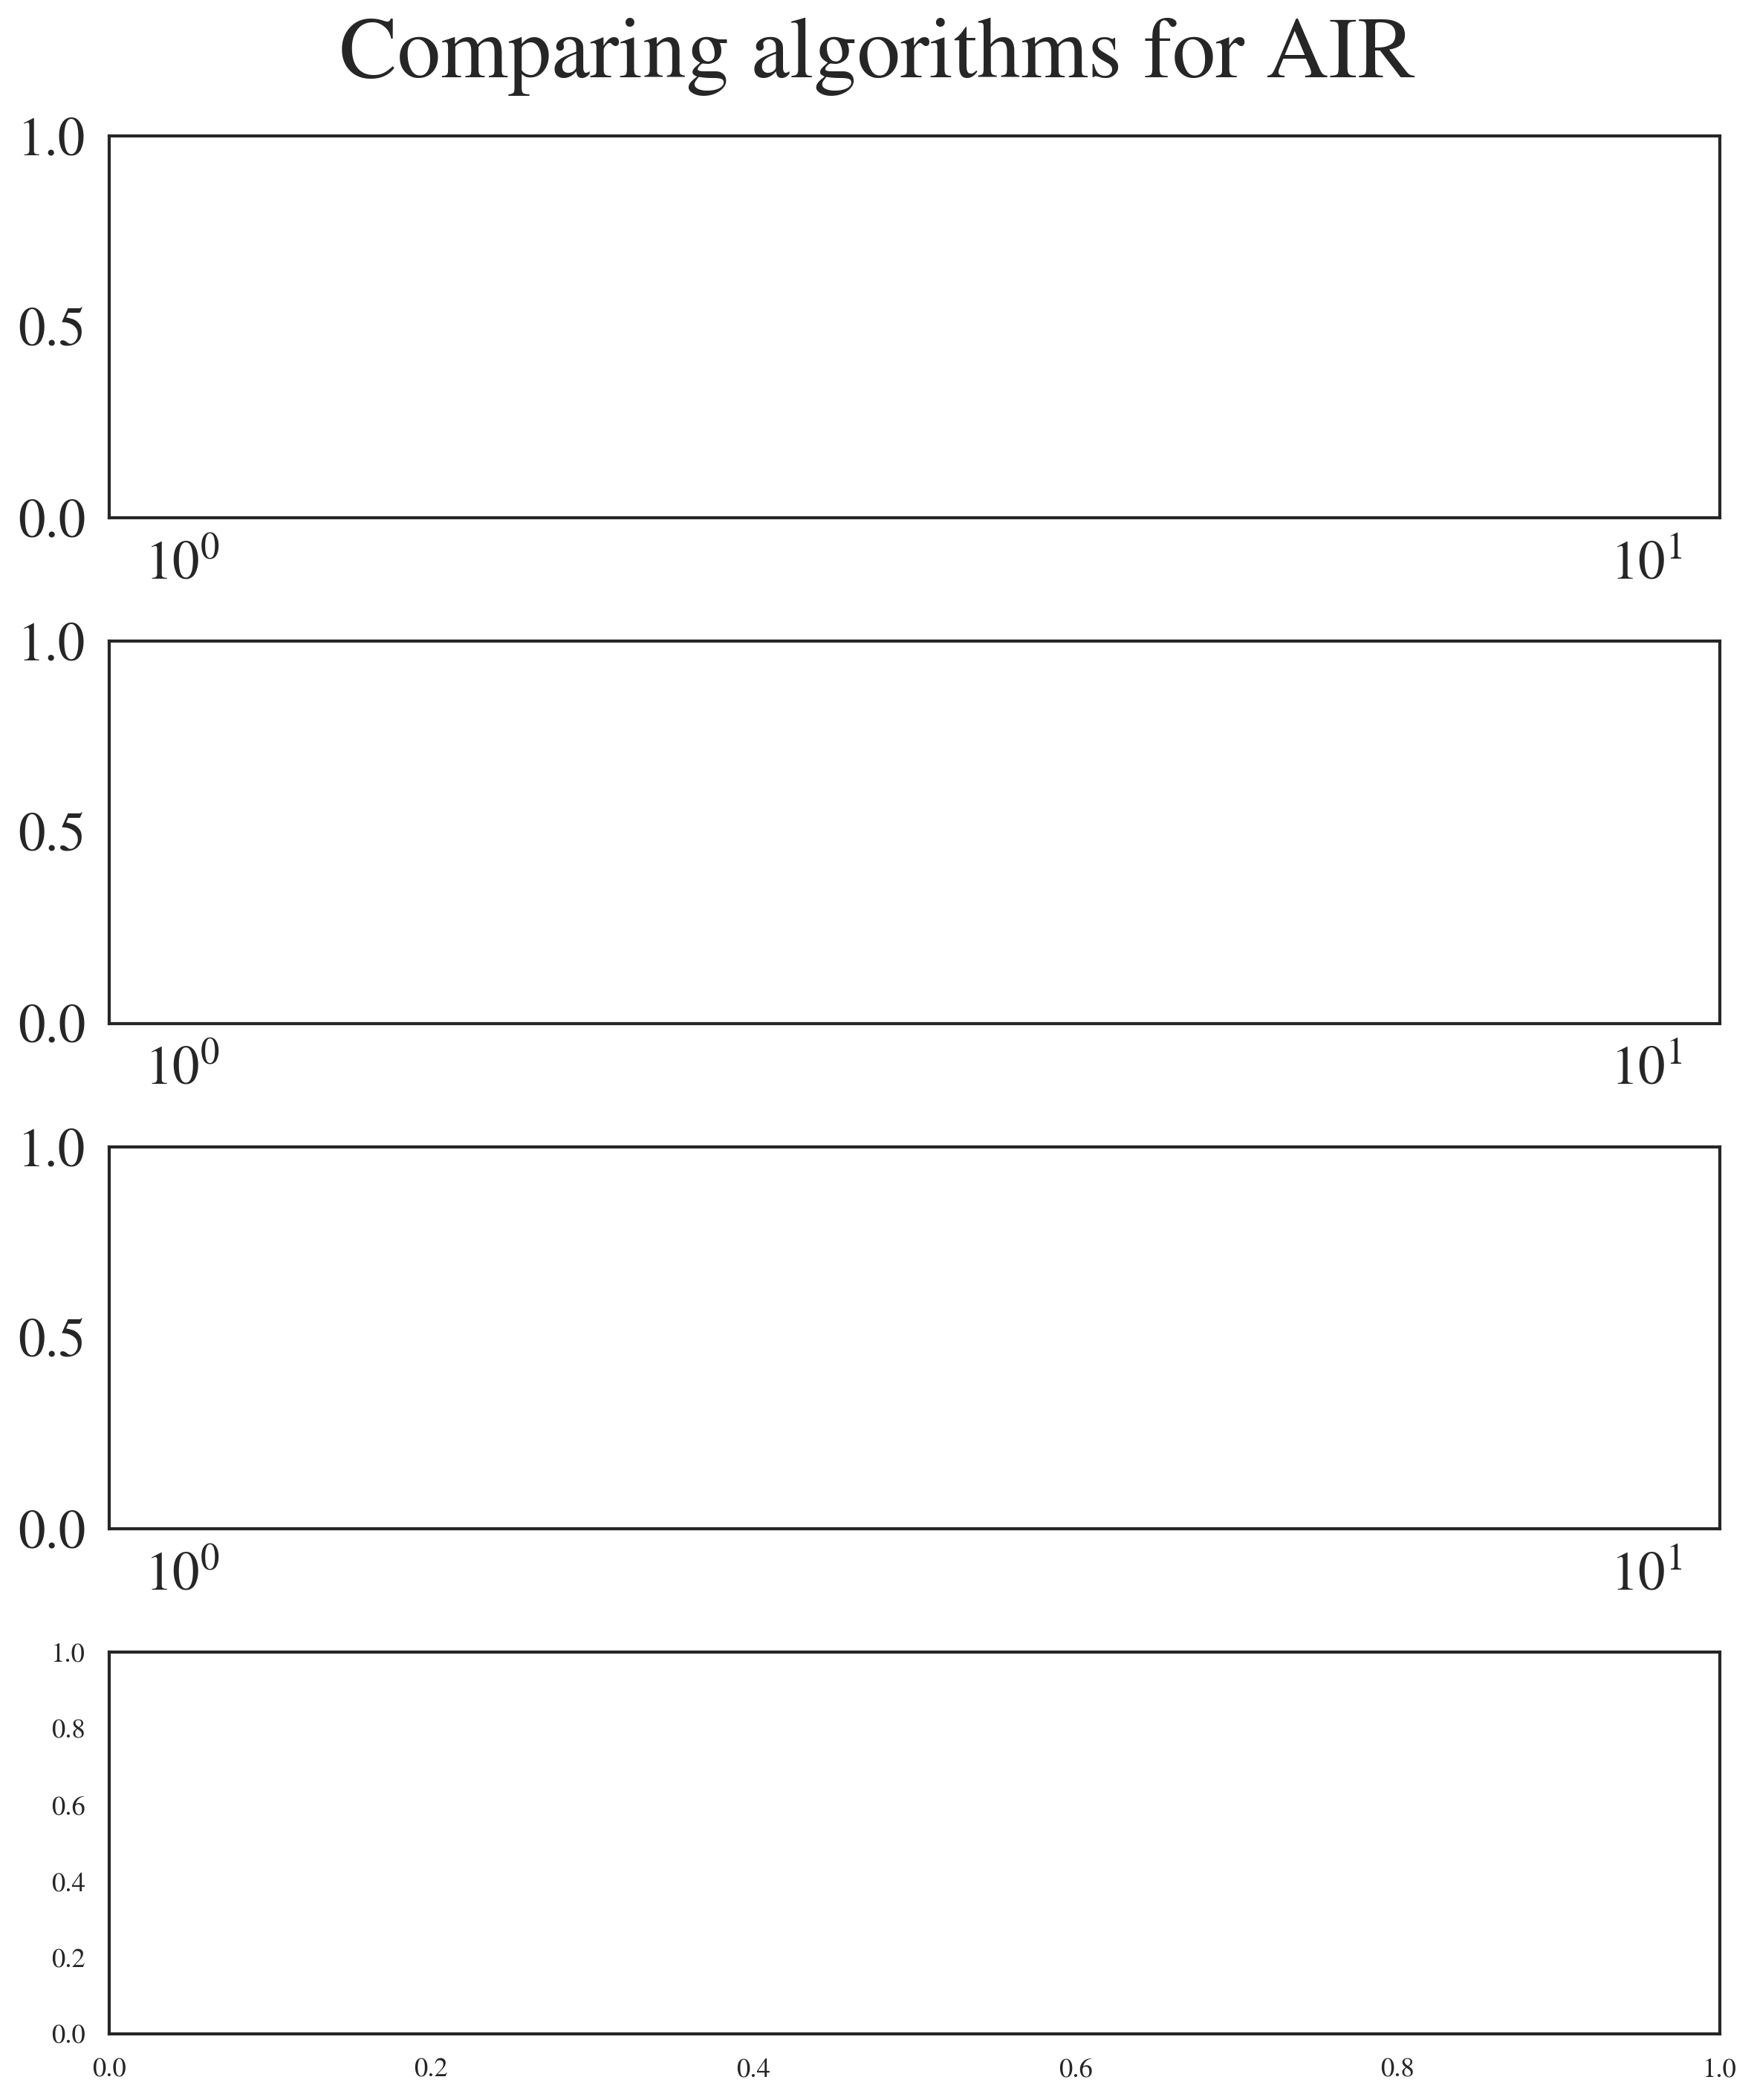

In [12]:
plt.rcParams["text.usetex"] = False
fig = plt.figure(figsize=(10, 12), dpi=240)
ax1 = fig.add_subplot(411)  # 3 rows, 1 column, 1st plot
ax2 = fig.add_subplot(412, sharex=ax1)  # 3 rows, 1 column, 2nd plot
ax3 = fig.add_subplot(413, sharex=ax1)
ax4 = fig.add_subplot(414)
fig.suptitle("Comparing algorithms for AIR", fontsize=label_fontsize / 2)
ax1.tick_params(axis="both", which="major", labelsize=label_fontsize / 3.2)
ax1.set_xscale("log")
ax2.tick_params(axis="both", which="major", labelsize=label_fontsize / 3.2)
ax2.set_xscale("log")
ax3.tick_params(axis="both", which="major", labelsize=label_fontsize / 3.2)
ax3.set_xscale("log")

In [13]:
def go_plot(
    ax,
    df,
    x,
    mean,
    std,
    label,
    cmap,
    color_idx,
    marker,
    fill=True,
    invert_for_pyro=False,
):
    if invert_for_pyro:
        scale = -1.0
    else:
        scale = 1.0
    l = ax.plot(
        np.array(df[x]),
        scale * np.array(df[mean]),
        label=label,
        color=cmap(color_idx),
        marker=marker,
    )
    if fill:
        ax.fill_between(
            np.array(df[x]),
            np.array(scale * df[mean]) - np.array(df[std]),
            np.array(scale * df[mean]) + np.array(df[std]),
            color=cmap(color_idx),
            alpha=0.2,
        )
    return l

/tmp/ipykernel_300913/1713065839.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(
/tmp/ipykernel_300913/1713065839.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap


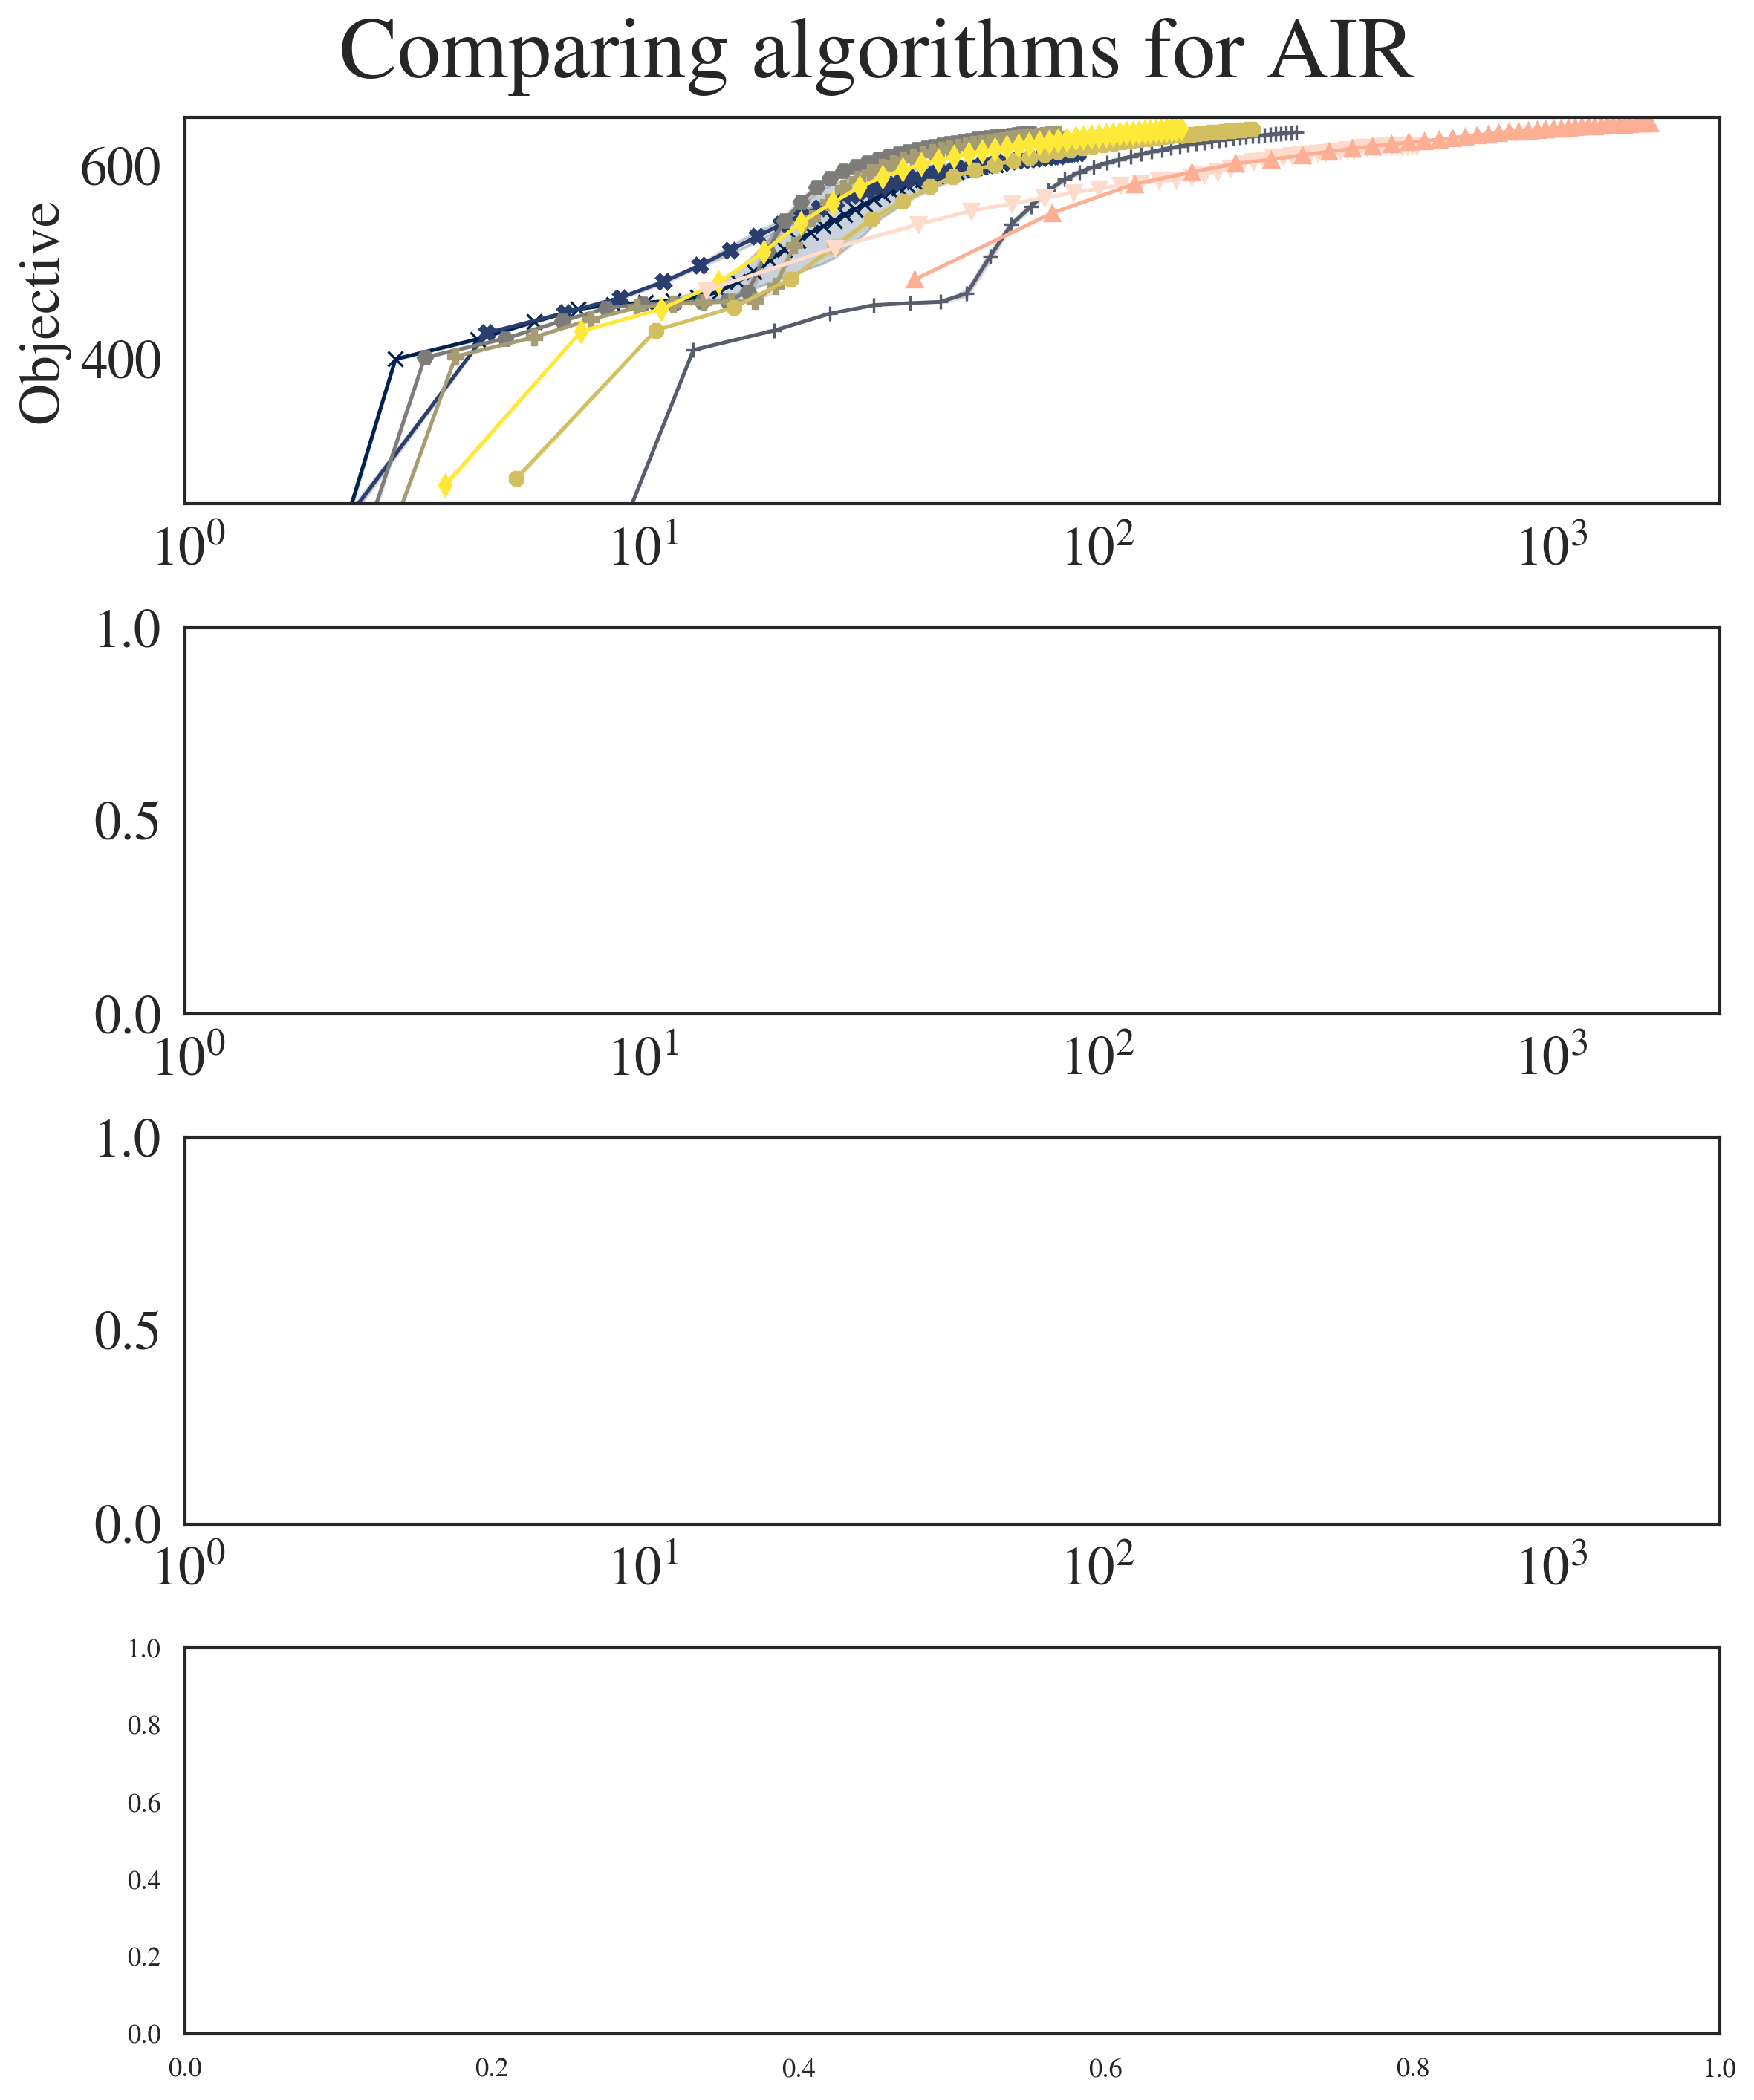

In [14]:
ax1.set_ylim(250, 650)
num_lines = 7  # Number of lines you want to plot
cmap = plt.cm.get_cmap(
    "cividis", num_lines
)  # Replace 'viridis' with your chosen colormap

ra_l = go_plot(
    ax1,
    reinforce_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (REINFORCE)",
    cmap,
    0,
    "x",
)
ria_l = go_plot(
    ax1,
    reinforce_iwae_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (IWAE + REINFORCE)",
    cmap,
    1,
    "X",
)
enum_l = go_plot(
    ax1,
    enum_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (Enum)",
    cmap,
    2,
    "+",
)
mvd_l = go_plot(
    ax1,
    mvd_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (MVD)",
    cmap,
    3,
    "H",
)
mvd_hybrid_l = go_plot(
    ax1,
    hybrid_mvd_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (Hybrid: MVD x2, ENUM)",
    cmap,
    4,
    "P",
)
iwae_mvd_hybrid_l = go_plot(
    ax1,
    hybrid_iwae_mvd_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (Hybrid: (IWAE) MVD x2, ENUM)",
    cmap,
    5,
    "8",
)
mvd_iwae_l = go_plot(
    ax1,
    mvd_iwae_air,
    "Mean epoch wall clock times",
    "Mean ELBO loss",
    "Std ELBO loss",
    "Ours (IWAE + MVD)",
    cmap,
    6,
    "d",
)

pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap

pyro_r_l = go_plot(
    ax1,
    pyro_reinforce_air,
    "Epoch wall clock times",
    "ELBO loss",
    "Std ELBO loss",
    "Pyro (REINFORCE)",
    pyro_cmap,
    1,
    "v",
    fill=False,
    invert_for_pyro=True,
)
pyro_r_b_l = go_plot(
    ax1,
    pyro_reinforce_baselines_air,
    "Epoch wall clock times",
    "ELBO loss",
    "Std ELBO loss",
    "Pyro (REINFORCE + baselines)",
    pyro_cmap,
    2,
    "^",
    fill=False,
    invert_for_pyro=True,
)
ax1.set_ylabel("Objective", fontsize=label_fontsize / 3)
fig

/tmp/ipykernel_300913/4011690477.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(
/tmp/ipykernel_300913/4011690477.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap


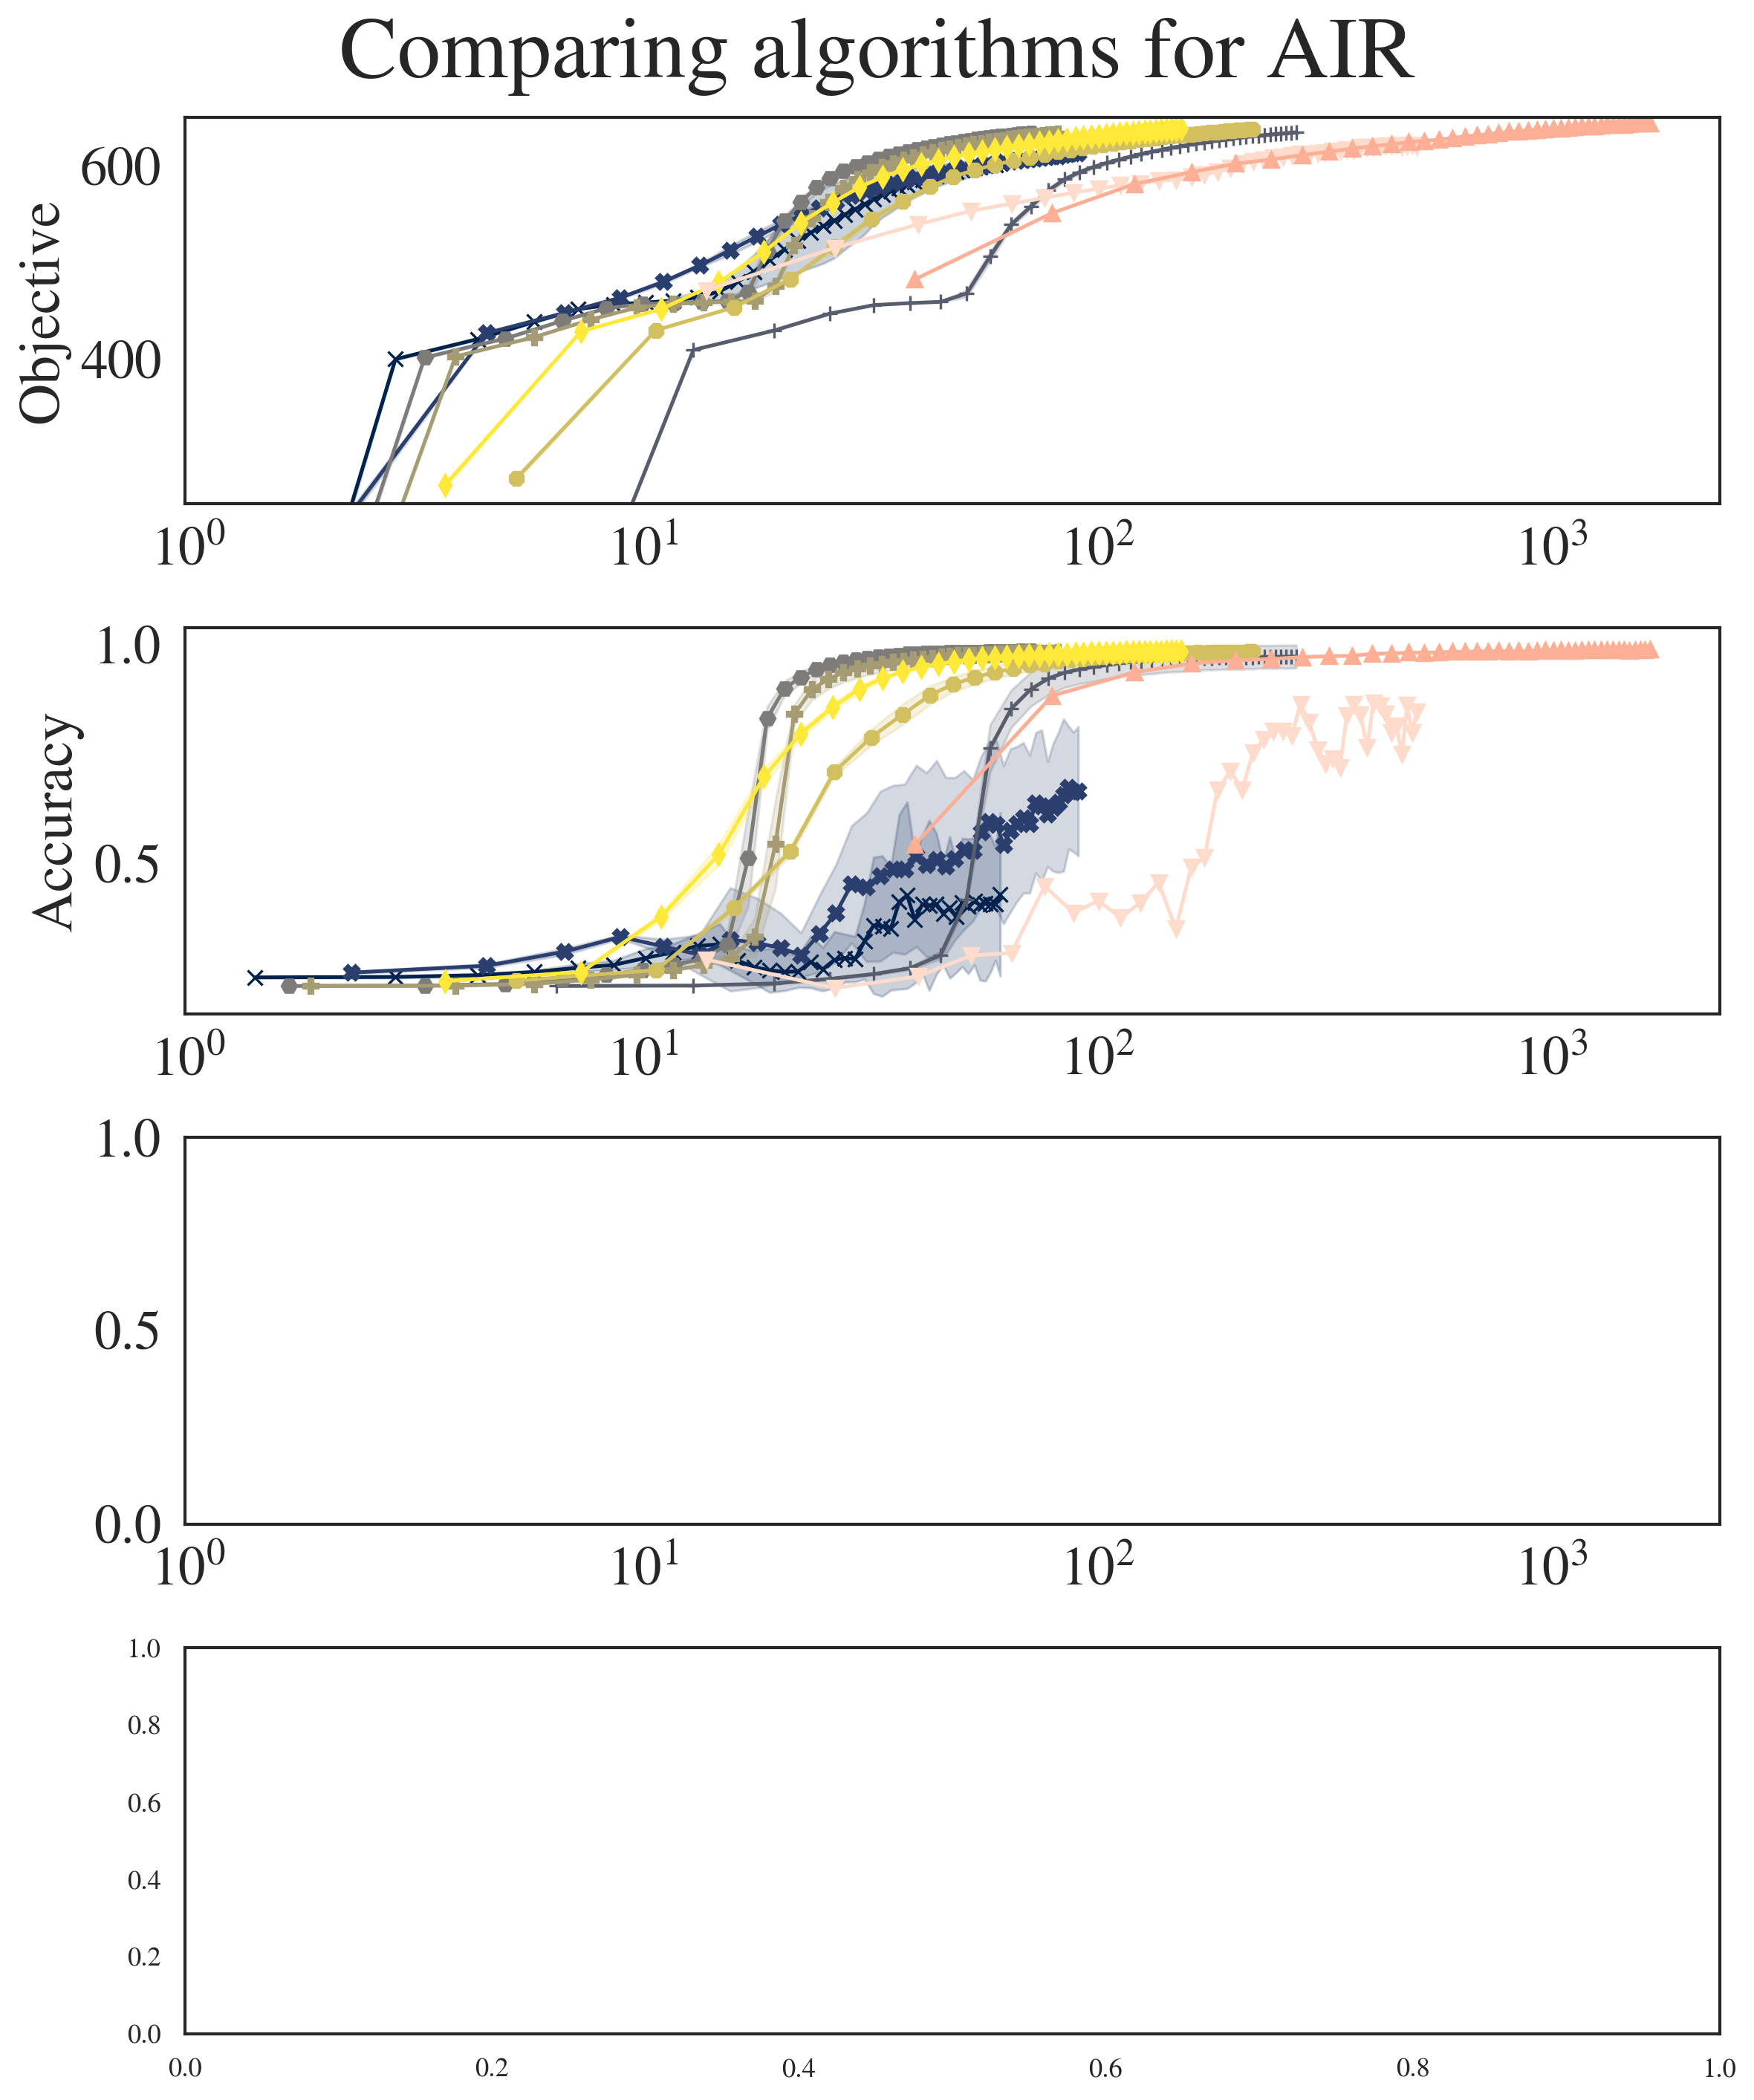

In [15]:
num_lines = 7  # Number of lines you want to plot
cmap = plt.cm.get_cmap(
    "cividis", num_lines
)  # Replace 'viridis' with your chosen colormap

go_plot(
    ax2,
    reinforce_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (REINFORCE)",
    cmap,
    0,
    "x",
)
go_plot(
    ax2,
    reinforce_iwae_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (IWAE + REINFORCE)",
    cmap,
    1,
    "X",
)
go_plot(
    ax2,
    enum_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (Enum)",
    cmap,
    2,
    "+",
)
go_plot(
    ax2,
    mvd_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (MVD)",
    cmap,
    3,
    "H",
)
go_plot(
    ax2,
    hybrid_mvd_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (MVD)",
    cmap,
    4,
    "P",
)
go_plot(
    ax2,
    hybrid_iwae_mvd_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (Hybrid: (IWAE) MVD x2, ENUM)",
    cmap,
    5,
    "8",
)
go_plot(
    ax2,
    mvd_iwae_air,
    "Mean epoch wall clock times",
    "Mean accuracy",
    "Std accuracy",
    "Ours (IWAE + MVD)",
    cmap,
    6,
    "d",
)

pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap

go_plot(
    ax2,
    pyro_reinforce_air,
    "Epoch wall clock times",
    "Accuracy",
    "Std accuracy",
    "Pyro (REINFORCE)",
    pyro_cmap,
    1,
    "v",
    fill=False,
    invert_for_pyro=False,
)
go_plot(
    ax2,
    pyro_reinforce_baselines_air,
    "Epoch wall clock times",
    "Accuracy",
    "Std accuracy",
    "Pyro (REINFORCE + baselines)",
    pyro_cmap,
    2,
    "^",
    fill=False,
    invert_for_pyro=False,
)

ax2.set_ylabel("Accuracy", fontsize=label_fontsize / 3)
fig

## RWS

In [16]:
def go_plot_rws(ax, df, x, mean, label, cmap, color_idx, marker):
    return ax.plot(
        np.array(df[x]),
        np.array(df[mean]),
        label=label,
        color=cmap(color_idx),
        marker=marker,
    )

In [17]:
rws_air_bz1_mvd = pd.read_csv(
    "./training_runs/grasp_air_rws_10_mvd_batch_size_1_epochs_21_mccoy_prior.csv"
)

In [18]:
rws_air_bz1_mvd

,P Loss,Q Loss,Accuracy,Epoch wall clock times
0,-256.555206,193.678009,0.746833,48.614624
1,-326.140839,202.778534,0.894367,96.622339
2,-356.145844,197.030167,0.908033,144.788769
3,-369.713745,195.317535,0.922567,193.550893
4,-378.977264,194.669403,0.940100,242.891554
5,-385.563843,193.134933,0.937733,288.665356
6,-390.803467,192.241013,0.946400,341.602070
7,-390.453186,193.467926,0.941067,394.239358
8,-395.933014,192.465729,0.938317,446.752440
9,-394.949036,193.808212,0.949167,498.334294


In [19]:
rws_air_mvd = pd.read_csv(
    "./training_runs/grasp_air_rws_10_mvd_epochs_201_mccoy_prior.csv"
)

In [20]:
pyro_rws_air = pd.read_csv(
    "./training_runs/pyro_air_rws_epochs_6_mccoy_prior_0.csv",
)

/tmp/ipykernel_300913/3201398490.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(
/tmp/ipykernel_300913/3201398490.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap


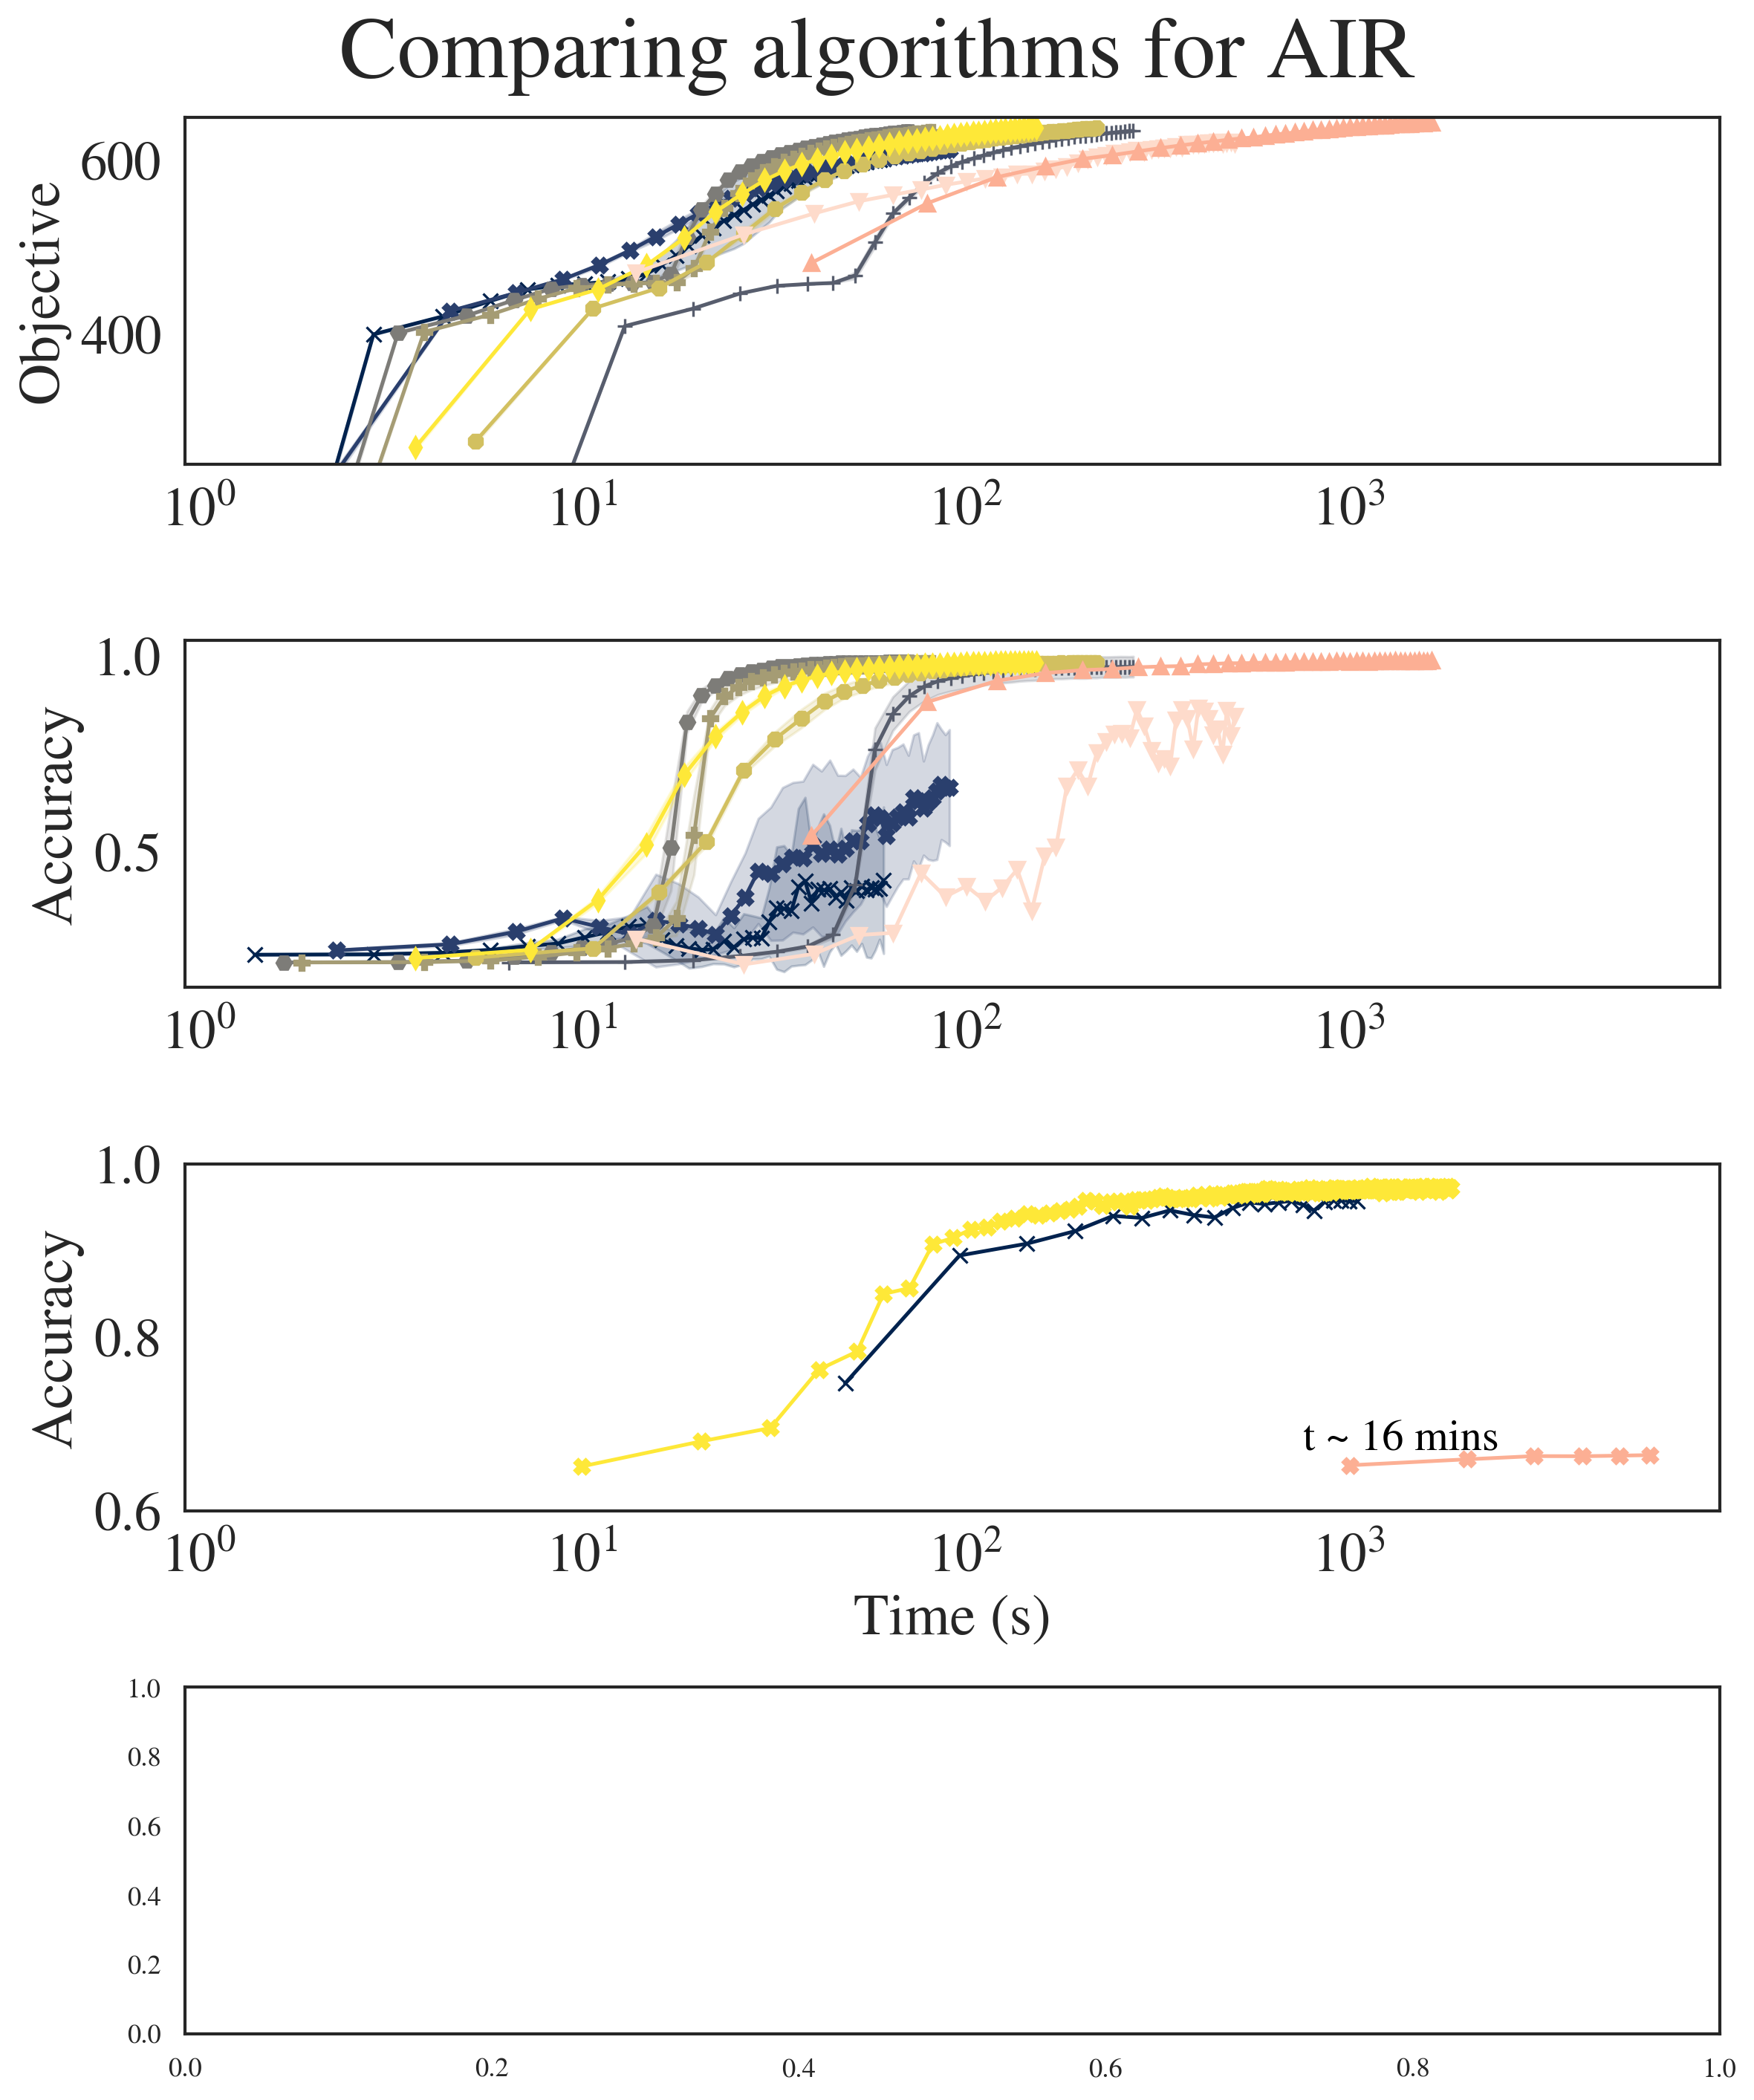

In [21]:
ax3.set_ylim(0.6, 1.0)
ax3.text(760, 0.67, "t ~ 16 mins", color="black", zorder=3, fontsize=label_fontsize / 4)

num_lines = 2  # Number of lines you want to plot
cmap = plt.cm.get_cmap(
    "cividis", num_lines
)  # Replace 'viridis' with your chosen colormap

rws_air_bz1_l = go_plot_rws(
    ax3,
    rws_air_bz1_mvd,
    "Epoch wall clock times",
    "Accuracy",
    "Ours (batch size = 1, RWS(K = 10))",
    cmap,
    0,
    "x",
)
rws_air_l = go_plot_rws(
    ax3,
    rws_air_mvd,
    "Epoch wall clock times",
    "Accuracy",
    "Ours (batch size = 64, RWS(K = 10))",
    cmap,
    2,
    "X",
)
pyro_cmap = plt.cm.get_cmap("Reds", 8)  # Replace 'viridis' with your chosen colormap

pyro_rws_l = go_plot_rws(
    ax3,
    pyro_rws_air,
    "Epoch wall clock times",
    "Accuracy",
    "Pyro (batch size = 1, RWS(K = 10))",
    pyro_cmap,
    2,
    "X",
)

ax3.set_xlabel("Time (s)", fontsize=label_fontsize / 3)
ax3.set_ylabel("Accuracy", fontsize=label_fontsize / 3)
fig

In [22]:
handles, labels = [], []
for ax in [ax1, ax3]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

# Create a single legend on the last axis
ax4.legend(handles, labels, loc="upper center", ncol=2, fontsize=label_fontsize / 3.85)
ax4.set_frame_on(False)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
fig.tight_layout()
fig.savefig("./img/air_collat.pdf", format="pdf")

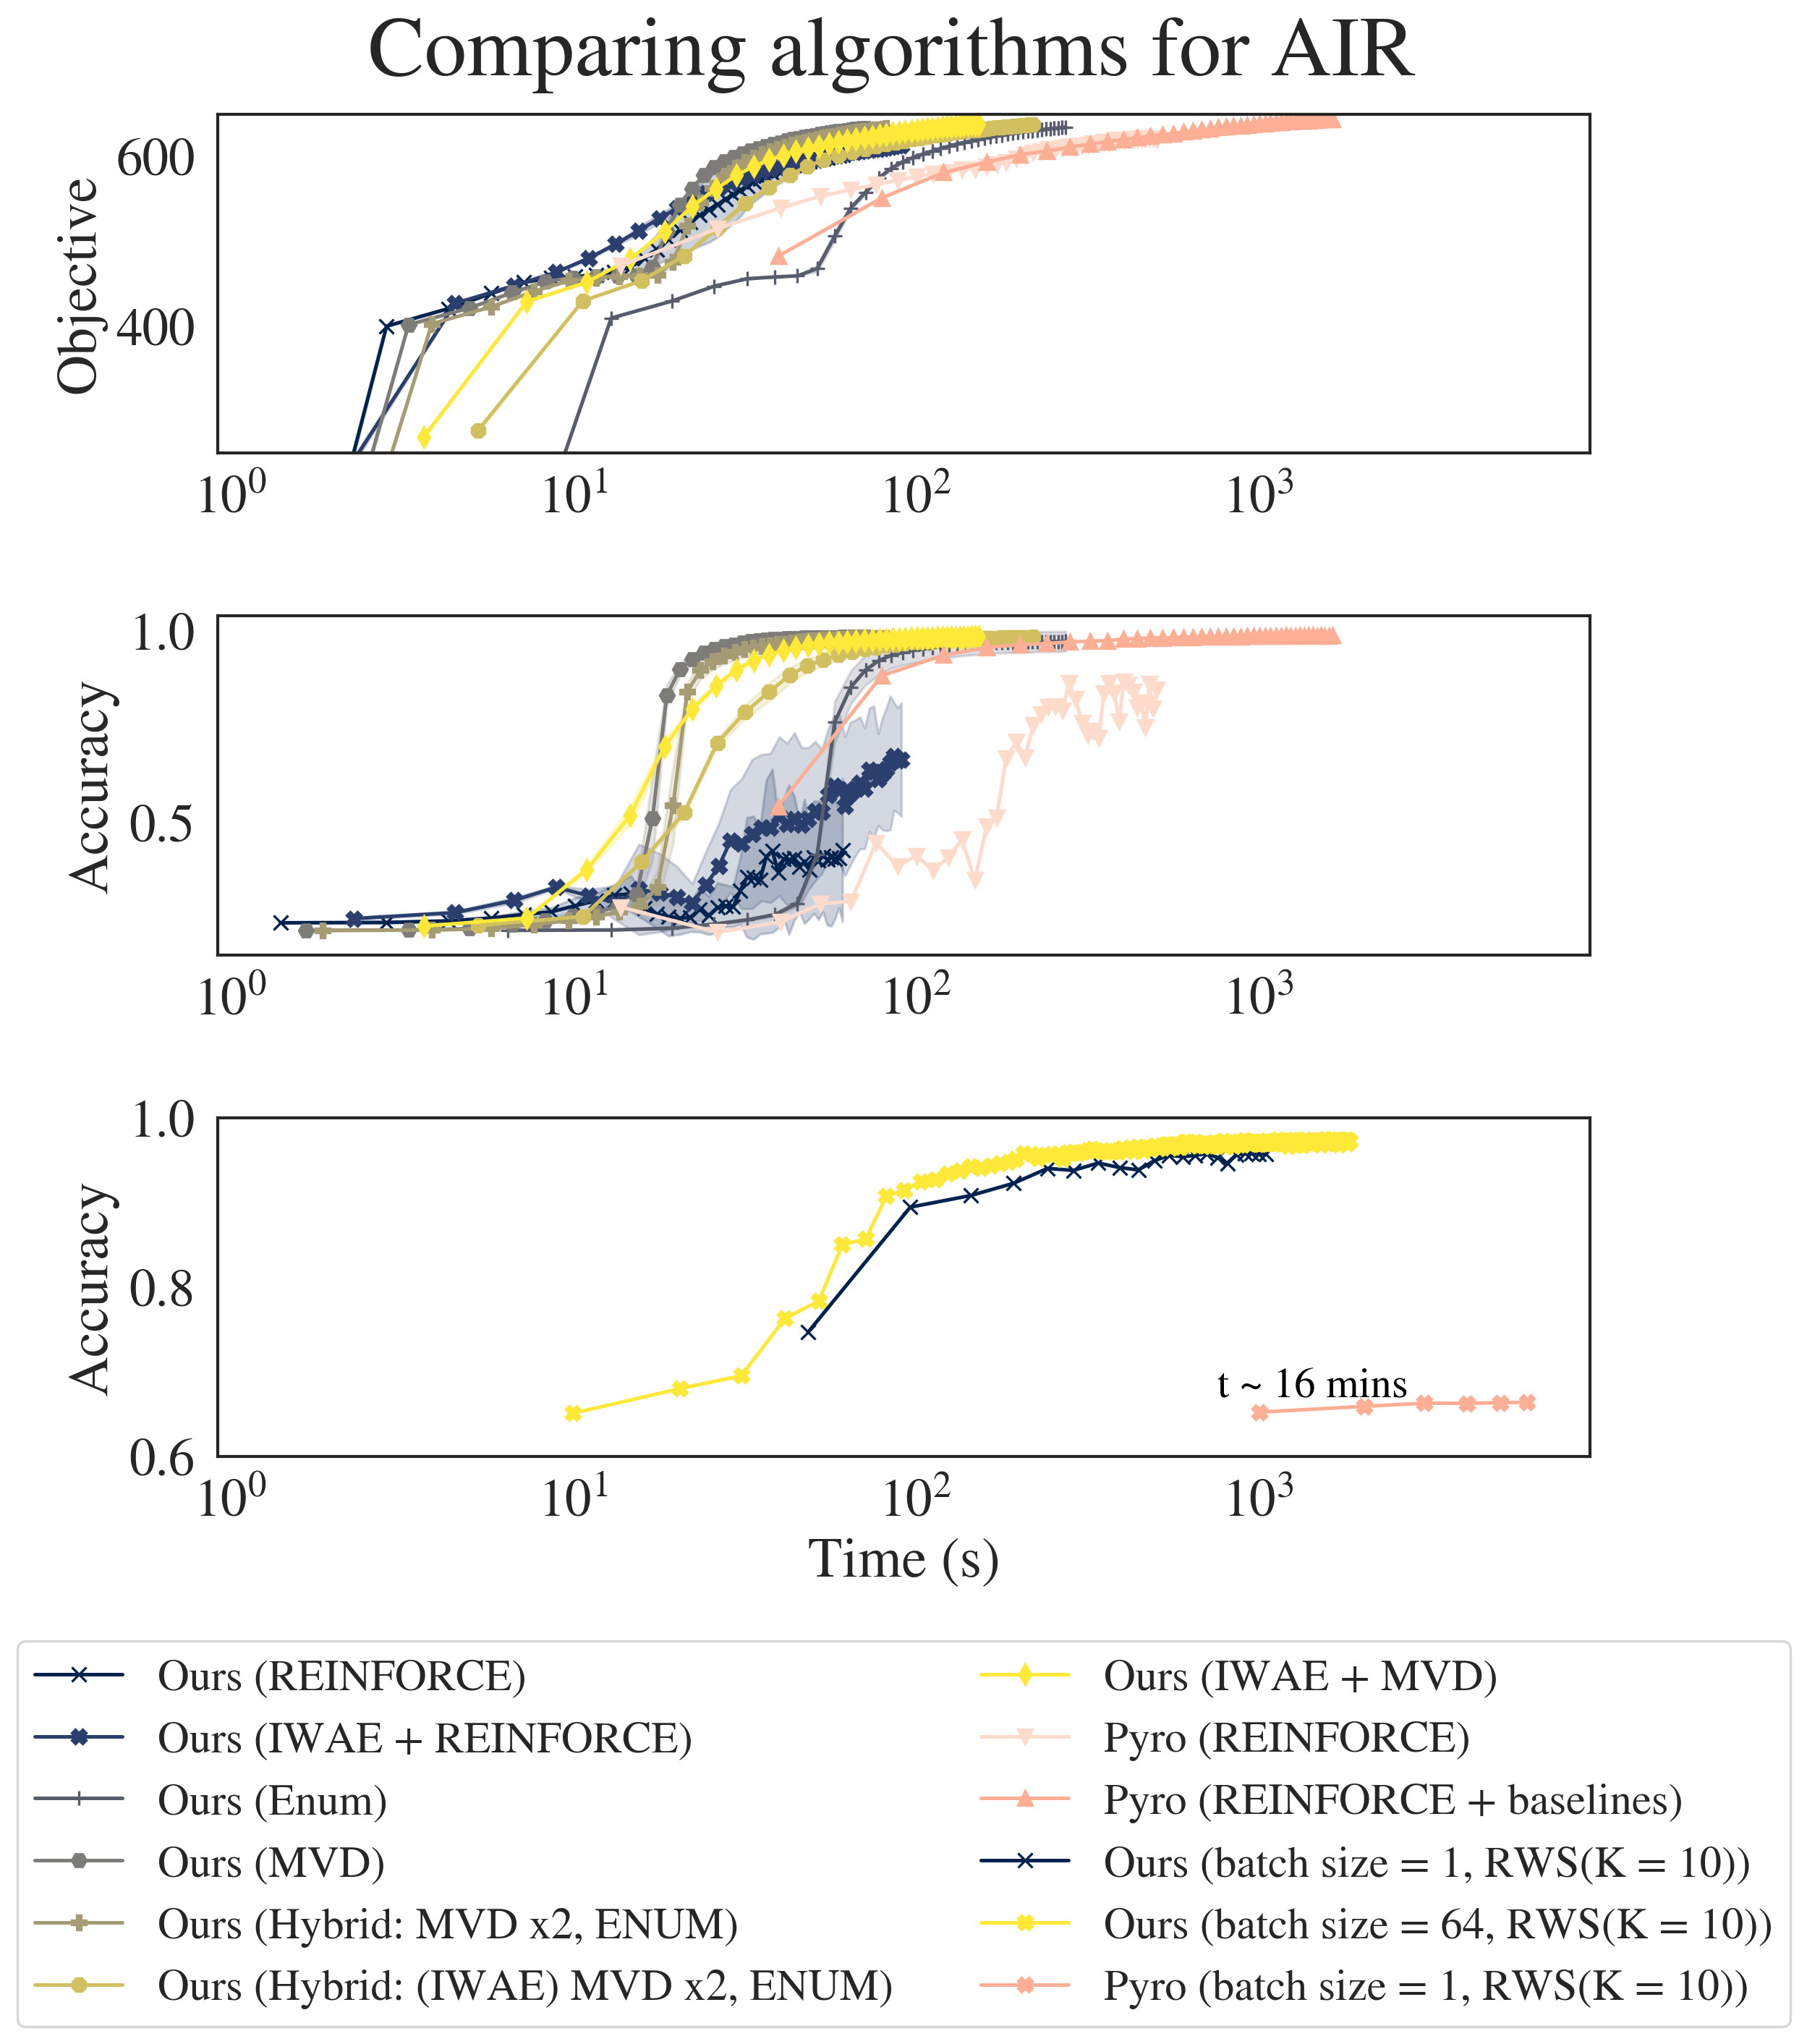

In [23]:
fig